In [49]:
from storm_analysis.daostorm_3d.mufit_analysis import analyze
import storm_analysis.sa_library.readinsight3 as readinsight3
import sys
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('error', RuntimeWarning)

In [50]:
sample_i3 = './sample_plate-Copy1.bin'

image_x_size = 512
image_y_size = 496

In [51]:
i3_reader = readinsight3.I3Reader(sample_i3)
frames = i3_reader.getNumberFrames()

w_x_mean_list = []
w_y_mean_list = []
frame_mean_number = []
for i in range(1, frames+1):
    data = i3_reader.getMoleculesInFrameRange(start = i, stop = i+1)
    molecules = len(data)
    
    xc = []
    yc = []
    zc = []
    w = []
    ratio = []
    
    """
    for j in range(molecules):
        w[j] = data[j][6]
        ratio[j] = data[j][8]    
    """

    for j in range(molecules):
        if (data[j][2] > 1*image_x_size/4. and data[j][2] < 3*image_x_size/4.) and\
            (data[j][3] > 1*image_y_size/4. and data[j][3] < 3*image_y_size/4.):
            xc.append(data[j][2])
            yc.append(data[j][3])
            w.append(data[j][6])
            ratio.append(data[j][8])
    
    xc = np.array(xc)
    yc = np.array(yc)
    w = np.array(w)
    ratio = np.array(ratio)
    
    w_x = np.sqrt(w*w/ratio)
    w_y = np.sqrt(w*w*ratio)
    
    while(len(w_x) % 6 != 0):
        w_x = np.append(w_x, np.mean(w_x))
    while(len(w_y) % 6 != 0):
        w_y = np.append(w_y, np.mean(w_y))
    
    np.random.RandomState(777)
    np.random.shuffle(w_x)
    np.random.RandomState(777)
    np.random.shuffle(w_y)
    
    w_x_mean_updated = np.mean(w_x.reshape(-1, 6), axis=1).flatten()
    w_y_mean_updated = np.mean(w_y.reshape(-1, 6), axis=1).flatten()
    
    for i, elem in enumerate(w_x_mean_updated):
        w_x_mean_list.append(elem)
    for i, elem in enumerate(w_y_mean_updated):
        w_y_mean_list.append(elem)
        
    frame_mean_number.append(len(w_x_mean_updated))

('Version:', 'M425')
('Frames:', 1)
('Status:', 6)
('Molecules:', 11284)



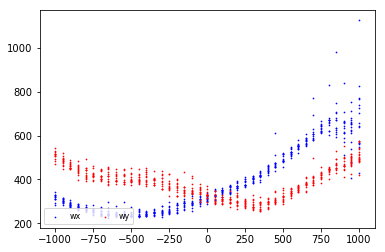

In [54]:
colors = ['b', 'r']

z = np.linspace(-1000, +1000, 41, dtype = float)
z = np.array([np.repeat(z[i], frame_mean_number[i]).tolist() for i in range(41)])

z_ = []
for i, arr in enumerate(z):
    for j, elem in enumerate(arr):
        z_.append(elem)

wx_plot = plt.scatter(z_, np.array(w_x_mean_list), marker='o', c=colors[0], edgecolors = 'face', s = 0.5)
wy_plot = plt.scatter(z_, np.array(w_y_mean_list), marker='o', c=colors[1], edgecolors = 'face', s = 0.5)

plt.legend((wx_plot, wy_plot),
           ('wx', 'wy'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()

In [46]:
import math

# x[0] : w_0
# x[1] : d
# x[2] : A
# x[3] : B
# x[4] : c
def fun(x, z, ww):
    return (x[0]**2)*(1 + ((z-x[4])/x[1])**2 + x[2]*((z-x[4])/x[1])**3 + x[3]*((z-x[4])/x[1])**4 + x[5]*((z-x[4])/x[1])**5 + x[6]*((z-x[4])/x[1])**6) - ww

from scipy.optimize import least_squares

z_ = np.array(z_)
w_x_mean_list = np.array(w_x_mean_list)
w_y_mean_list = np.array(w_y_mean_list)

x_res_robust = least_squares(fun, np.array([1, 1, 1, 1, 1, 1, 1]), args = (z_, w_x_mean_list**2), f_scale=0.1)
y_res_robust = least_squares(fun, np.array([1, 1, 1, 1, 1, 1, 1]), args = (z_, w_y_mean_list**2), f_scale=0.1)

def visaulize(z, model):
    print("w_0 : {}, c : {}, d : {}, A : {}, B : {}".format(model.x[0], model.x[4], model.x[1], model.x[2], model.x[3]))
    w = fun(model.x, z, 0)

    plt.figure(1)
    plt.scatter(z, np.sqrt(w))

w_0 : 239.31386641, c : -566.646612478, d : 537.584850479, A : -0.544458867979, B : -0.116444922778


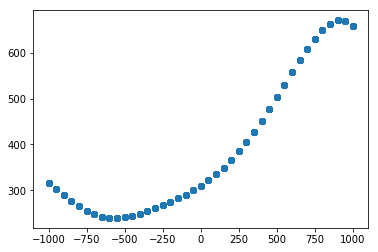

In [47]:
visaulize(z_, x_res_robust)

plt.show()

w_0 : 287.986831523, c : 283.040516126, d : 452.969742259, A : 0.290456074866, B : -0.159309938181


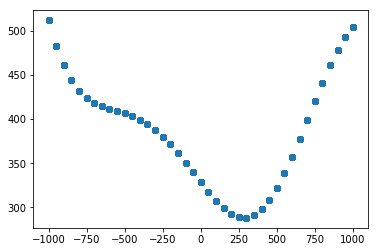

In [48]:
visaulize(z_, y_res_robust)

plt.show()